https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16

https://machinelearningmastery.com/case-study-predicting-the-onset-of-diabetes-within-five-years-part-1-of-3/

<h1 style="color:white;background-color:black;text-align:center"> Partie A : lecture des données</h1>

<span style='color:white;font-weight:bold;background-color:purple;width:12px'>1.</span> Ouverture et traitement

In [1]:
import pandas
import pylab as pl
pl.style.use('seaborn')

from mpl_toolkits.mplot3d import Axes3D

from seaborn import boxplot, pairplot

T = pandas.read_csv('diabetes_learning2.csv')
P = pandas.read_csv('diabetes_test1.csv')
T.head()

,grossesses,glucose,pression,insuline,imc,K,age,M
0,2,104,75,28,39.020106,0.145273,35,1
1,10,121,64,517,30.672607,0.154211,43,1
2,2,153,59,87,26.295668,1.029407,22,1
3,9,145,47,226,46.077807,0.086713,37,1
4,3,102,76,315,28.335339,0.109751,21,1


T_deb = T.head(200)
T_fin = T.tail(200)

T = pandas.concat([T_deb,T_fin])
T.reset_index(drop=True, inplace=True)
T.to_csv('diabetes_learning2.csv',index=None,encoding='utf8')

In [2]:
T.corr()

,grossesses,glucose,pression,insuline,imc,K,age,M
grossesses,1.000000,0.042482,-0.011859,0.098265,0.167020,0.035275,0.161596,0.458489
glucose,0.042482,1.000000,0.018904,0.050744,0.023634,-0.023857,-0.029909,0.073964
pression,-0.011859,0.018904,1.000000,0.033123,0.001515,-0.020413,0.066938,0.076983
insuline,0.098265,0.050744,0.033123,1.000000,0.080907,0.050547,0.082088,0.298825
imc,0.167020,0.023634,0.001515,0.080907,1.000000,-0.000807,0.047868,0.260743
K,0.035275,-0.023857,-0.020413,0.050547,-0.000807,1.000000,0.100317,0.199581
age,0.161596,-0.029909,0.066938,0.082088,0.047868,0.100317,1.000000,0.299672
M,0.458489,0.073964,0.076983,0.298825,0.260743,0.199581,0.299672,1.000000


<p style='color:white;font-weight:bold;background-color:purple;width:12px'>3.</p>Nombre de diabétiques : 

In [3]:
para = ['grossesses','age','imc','M']
par = ['grossesses','age','imc']
T = T[para]
P = P[para]

In [4]:
Moy = T.mean()
Moy

grossesses     3.820000
age           30.780000
imc           31.853995
M              0.500000
dtype: float64

In [5]:
Std = T.std()
Std

grossesses     3.526854
age           12.612863
imc            9.642392
M              0.500626
dtype: float64

In [6]:
Tn = (T - Moy)/Std
Pn = (P - Moy)/Std

In [7]:
Tn['M'] = T['M']
Tn.head()

,grossesses,age,imc,M
0,-0.516041,0.334579,0.743188,1
1,1.752270,0.968852,-0.122520,1
2,-0.516041,-0.696115,-0.576447,1
3,1.468731,0.493147,1.475133,1
4,-0.232502,-0.775399,-0.364915,1


In [8]:
Pn['M'] = P['M']
Pn.head()

,grossesses,age,imc,M
0,1.185192,-0.696115,-0.705758,1
1,-1.083118,1.048136,-0.231370,1
2,-0.516041,2.316683,-0.076123,1
3,-0.232502,-0.775399,-0.499606,1
4,1.468731,-0.696115,0.651361,1


In [9]:
def couleur(x):
    if x == 1:
        return 'red'
    else:
        return 'green'
Tn['c'] = Tn['M'].apply(couleur)

<IPython.core.display.Javascript object>


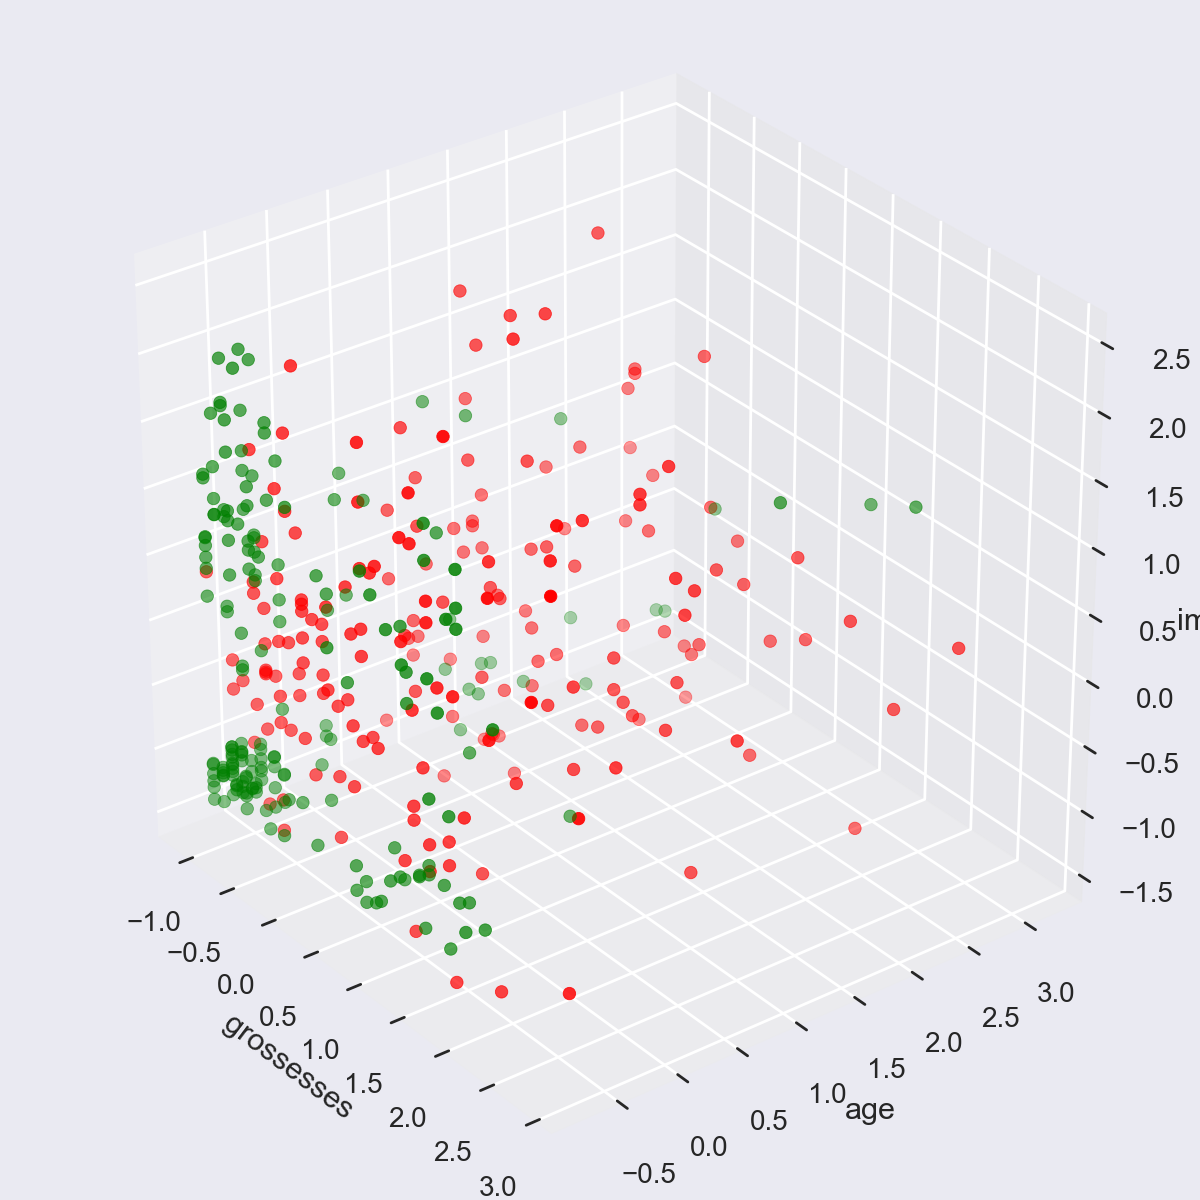

Text(0.5, 0, 'imc')

In [32]:
%matplotlib notebook
fig = pl.figure(figsize=(6,6))

ax = Axes3D(fig) 

ax.scatter(Tn['grossesses'], Tn['age'], Tn['imc'], c=Tn['c'], marker='o')
ax.set_xlabel('grossesses')
ax.set_ylabel('age')
ax.set_zlabel('imc')

In [12]:
C = Tn[para].corr()
C

,grossesses,age,imc,M
grossesses,1.000000,0.161596,0.167020,0.458489
age,0.161596,1.000000,0.047868,0.299672
imc,0.167020,0.047868,1.000000,0.260743
M,0.458489,0.299672,0.260743,1.000000


In [13]:
from numpy import *
from numpy.linalg import *

L = []
for i in par:
    L.append([C.loc[i,j] for j in par])
M = matrix(C)
M

matrix([[1.        , 0.16159554, 0.16701992, 0.4584887 ],
        [0.16159554, 1.        , 0.04786825, 0.29967246],
        [0.16701992, 0.04786825, 1.        , 0.26074313],
        [0.4584887 , 0.29967246, 0.26074313, 1.        ]])

In [14]:
eig(M)

(array([1.74637275, 0.50073255, 0.79984971, 0.95304499]),
 matrix([[ 0.5556829 ,  0.55552054,  0.61756432,  0.03503923],
         [ 0.39695809,  0.26192793, -0.55402741, -0.68328008],
         [ 0.36987672,  0.18917751, -0.5443346 ,  0.72876809],
         [ 0.62994603, -0.76616092,  0.12396685, -0.02824288]]))

In [15]:
L1 = Tn[par].loc[0]
L1

grossesses   -0.516041
age           0.334579
imc           0.743188
Name: 0, dtype: float64

In [16]:
L2 = Pn[par].loc[0]
L2

grossesses    1.185192
age          -0.696115
imc          -0.705758
Name: 0, dtype: float64

In [17]:
diff = (L1-L2)**2
diff.sum()**0.5

2.46088745713534

In [18]:
def distance(i,patient):
    L1 = Tn[par].loc[i]
    L2 = Pn[par].loc[patient]
    diff = (L1-L2)**2
    return diff.sum()**0.5

In [19]:
T['d'] = [distance(i,0) for i in range(400)]
T.sort_values('d').head(7)

,grossesses,age,imc,M,d
7,8,21,24.678754,1,0.088084
127,8,22,27.367044,1,0.240422
51,9,23,25.068618,1,0.294422
68,9,21,25.216458,1,0.294928
147,8,22,28.387292,1,0.346230
113,9,23,26.808369,1,0.346381
80,9,21,27.176917,1,0.367954


In [20]:
T.sort_values('d').head(7).M.sum()

7

In [21]:
def prediction(patient):
    T['d'] = [distance(i,patient) for i in range(400)]
    nb_malades = T.sort_values('d').head(11).M.sum()
    if nb_malades >= 4:
        return 1
    else:
        return 0

In [22]:
prediction(0)

1

In [23]:
tirages = Pn.sample(50)

In [24]:
Pn['T'] = [prediction(patient) for patient in range(400)]
Pn.head()

,grossesses,age,imc,M,T
0,1.185192,-0.696115,-0.705758,1,1
1,-1.083118,1.048136,-0.231370,1,1
2,-0.516041,2.316683,-0.076123,1,1
3,-0.232502,-0.775399,-0.499606,1,1
4,1.468731,-0.696115,0.651361,1,1


In [27]:
Z = pandas.crosstab(Pn['M'],Pn['T'],margins=True)
Z

T,0,1,All
M,,,
0,144,56,200
1,7,193,200
All,151,249,400


In [28]:
(Z.loc[0,0]+Z.loc[1,1])/400

0.8425

In [29]:
Z.loc[0,0]/200

0.72

In [30]:
Z.loc[1,1]/200

0.965

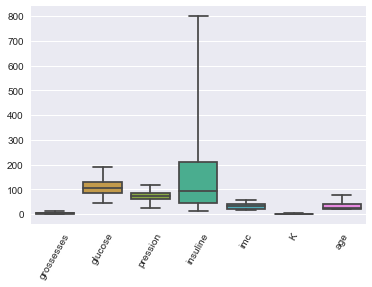

In [21]:
ax = boxplot(data=T,whis='range', order=parametres)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
pl.show()

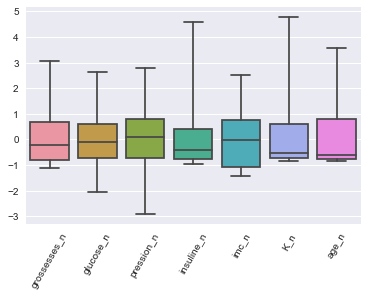

In [20]:
N = [c+'_n' for c in parametres]
ax = boxplot(data=T,whis='range', order=N)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
pl.show()

In [23]:
pn = [c+'_n' for c in parametres]

In [ ]:
def distance():
    d = 0
    for c in pn:
        d = 
        

In [16]:
for k in range(400):
    for c in parametres:
        Pn.loc[k,c] = (P.loc[k,c] - moy[c])/sig[c]
Pn.head()

,grossesses,glucose,pression,insuline,imc,K,age,M
0,1.267801,-0.057662,-0.226150,0.159648,-0.727548,-0.737396,-0.755614,1
1,-1.096948,-1.158376,0.753715,0.717660,-0.248709,1.071236,0.972177,1
2,-0.505761,2.017972,0.080058,3.246372,-0.092005,1.738916,2.228752,1
3,-0.210167,-0.089111,0.141299,0.371551,-0.519462,-0.798641,-0.834150,1
4,1.563395,0.854359,-0.593599,0.025443,0.642304,0.216025,-0.755614,1


In [17]:
def distance(patient,individu):
    d = 0
    for c in parametres:
        d = d + (Pn.loc[patient,c] - Tn.loc[individu,c])**2
    return d**0.5

In [10]:
import operator

In [10]:
D = [distance(0,i) for i in range(4000)]
M = list(Tn.M)
L = [[d,m] for d,m in zip(D,M)]
L = sorted(L, key=operator.itemgetter(0))[:11]
n = 0
for x in L:
    n = n + x[1]
n

11

In [20]:
Tn1.index

RangeIndex(start=0, stop=4000, step=1)

In [27]:
Tn1.sort_values('d').head(11).M.sum()

9

In [37]:
def resultat(patient):
    Tn1 = Tn.copy()
    for i in range(4000):
        Tn1.loc[i,'d'] = distance(patient,i)
    voisins_malades = Tn1.sort_values('d').head(11).M.sum()
    if voisins_malades >= 6:
        return 1,Pn.loc[patient,'M']
    else:
        return 0,Pn.loc[patient,'M']

In [38]:
from random import randint

In [40]:
for k in range(20):
    c = randint(0,399)
    print(c,resultat(c))

379 (0, 0)
321 (0, 0)
288 (0, 0)
378 (1, 0)
6 (1, 1)
80 (1, 1)
263 (0, 0)
147 (1, 1)
131 (1, 1)
147 (1, 1)
126 (1, 1)
215 (0, 0)
201 (0, 0)
17 (1, 1)
334 (0, 0)
179 (1, 1)
167 (1, 1)
378 (1, 0)
30 (1, 1)
338 (0, 0)


In [18]:
def resultat(patient):
    D = [distance(0,i) for i in range(4000)]
    L = [[d,m] for d,m in zip(D,list(Tn['M']))]
    L = sorted(L, key=operator.itemgetter(0))[:11]
    n = 0
    for x in L:
        n = n + x[1]
    if n >= 6:
        return 1
    else:
        return 0

In [ ]:
L = [resultat(patient) for patient in range(400)]

In [13]:
Pn['T'] = L

<h1 style="color:white;background-color:black;text-align:center"> Partie B : modèle d'un classement</h1>

<p style='color:white;font-weight:bold;background-color:purple;width:12px'>1.</p>
Croisement de la variable `M` avec `T` dans <b>Pat</b>

In [14]:
C = pandas.crosstab(Pn['M'],Pn['T'],margins=True)
C

T,1,All
M,,
0,200,200
1,200,200
All,400,400


<p style='color:white;font-weight:bold;background-color:purple;width:12px'>2.</p> La sensibilité est la probabilité d'avoir un test positif sachant qu'on est malade

In [14]:
sensibilité = C.loc[1,1]/C.loc[1,'All']
sensibilité

0.851

<p style='color:white;font-weight:bold;background-color:purple;width:12px'>2.</p> La spécificité est la probabilité d'avoir un test négatif sachant qu'on n'est pas malade

In [15]:
spécificité = C.loc[0,0]/C.loc[0,'All']
spécificité

0.815

<p style='color:white;font-weight:bold;background-color:purple;width:12px'>3.</p> La précision du test est la probabilité d'être bien classé

In [16]:
précision = (C.loc[0,0]+C.loc[1,1])/C.loc['All','All']
précision

0.833

<p style='color:white;font-weight:bold;background-color:purple;width:12px'>4.</p>